# Finance Data Project - Solutions

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\delchain_default\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Data

We need to get data using pandas datareader. We will get stock information for the following banks:

* Bank of America

* CitiGroup

* Goldman Sachs

* JPMorgan Chase

* Morgan Stanley

* Wells Fargo

In [2]:
yf.pdr_override()
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Use pandas datareader to fetch the data

In [3]:
# Bank of America
BAC = data.get_data_yahoo("BAC", start, end)
# CitiGroup
C = data.get_data_yahoo("C", start, end)
# Goldman Sachs
GS = data.get_data_yahoo("GS", start, end)
# JPMorgan Chase
JPM = data.get_data_yahoo("JPM", start, end)
# Morgan Stanley
MS = data.get_data_yahoo("MS", start, end)
# Wells Fargo
WFC = data.get_data_yahoo("WFC", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
WFC.describe

<bound method NDFrame.describe of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2006-01-03  31.600000  31.975000  31.195000  31.900000  20.408512  11016400
2006-01-04  31.799999  31.820000  31.365000  31.530001  20.171795  10870000
2006-01-05  31.500000  31.555000  31.309999  31.495001  20.149401  10158000
2006-01-06  31.580000  31.775000  31.385000  31.680000  20.267757   8403800
2006-01-09  31.674999  31.825001  31.555000  31.674999  20.264565   5619600
...               ...        ...        ...        ...        ...       ...
2015-12-24  54.970001  55.090000  54.709999  54.820000  46.785397   4999400
2015-12-28  54.549999  54.779999  54.169998  54.680000  46.665909   8288800
2015-12-29  55.110001  55.349998  54.990002  55.290001  47.186504   7894900
2015-12-30  55.270000  55.310001  54.790001  54.889999  46.845135   8016900
2015-12-31  54.509998  54.950001  54.220001  54.360001

In [5]:
bank_stock = pd.concat([BAC, C], axis=1, sort=False)
bank_stock = pd.concat([bank_stock, GS], axis=1, sort=False)
bank_stock = pd.concat([bank_stock, JPM], axis=1, sort=False)
bank_stock = pd.concat([bank_stock, MS], axis=1, sort=False)
bank_stock = pd.concat([bank_stock, WFC], axis=1, sort=False)
bank_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2006-01-03 to 2015-12-31
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   float64
 6   Open       2517 non-null   float64
 7   High       2517 non-null   float64
 8   Low        2517 non-null   float64
 9   Close      2517 non-null   float64
 10  Adj Close  2517 non-null   float64
 11  Volume     2517 non-null   float64
 12  Open       2517 non-null   float64
 13  High       2517 non-null   float64
 14  Low        2517 non-null   float64
 15  Close      2517 non-null   float64
 16  Adj Close  2517 non-null   float64
 17  Volume     2517 non-null   float64
 18  Open       2517 non-null   float64
 19  High       2517 non-null   flo

In [6]:
bank_stock.columns = pd.MultiIndex.from_product([['BAC','C','GS','JPM','MS','WFC'],['Open','High','Low','Close','Adj Close','Volume']])
bank_stock.head()

BAC                                                          \
                 Open       High        Low      Close  Adj Close      Volume   
Date                                                                            
2006-01-03  46.919998  47.180000  46.150002  47.080002  35.054218  16296700.0   
2006-01-04  47.000000  47.240002  46.450001  46.580002  34.681938  17757900.0   
2006-01-05  46.580002  46.830002  46.320000  46.639999  34.726604  14970700.0   
2006-01-06  46.799999  46.910000  46.349998  46.570000  34.674480  12599800.0   
2006-01-09  46.720001  46.970001  46.360001  46.599998  34.696808  15619400.0   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   

                                                   WFC                        \
                Close  Adj Close     Volume       Open       High        Low   
Date                                                                           
2006-01-03  58.310001  37.399338  5377000.0  31.600000  31.975000  31.195000   
2006-01-04  58.349998  37.424999  7977800.0  31.799999  31.820000  31.365000   
2006-01-05  58.509998  37.527611  5778000.0  31.500000  31.555000  31.309999   
2006-01-06  58.570000  37.566090  6889800.0  31.580000  31.775000  31.385000   
2006-01-09  59.189999  37.963749  4144500.0  31.674999  31.825001  31.555000   

                                              
                Close  Adj Close      Volume  
Date                                          
2006-01-03  31.900000  20.408512  11016400.0  
2006-01-04  31.530001  20.171795  10870000.0  
2006-01-05  31.495001  20.149401  10158000.0  
2006-01-06  31.680000  20.267757   8403800.0  
2006-01-09  31.674999  20.264565   5619600.0  

[5 rows x 36 columns]

In [19]:
# Set the column name levels 'Bank Ticker','Stock Info'

bank_stock.columns = bank_stock.columns.rename("Bank Ticker", level=0)
bank_stock.columns = bank_stock.columns.rename("Stock Info", level=1)
bank_stock.head()


Bank Ticker        BAC                                              \
Stock Info        Open       High        Low      Close  Adj Close   
Date                                                                 
2006-01-03   46.919998  47.180000  46.150002  47.080002  35.054218   
2006-01-04   47.000000  47.240002  46.450001  46.580002  34.681938   
2006-01-05   46.580002  46.830002  46.320000  46.639999  34.726604   
2006-01-06   46.799999  46.910000  46.349998  46.570000  34.674480   
2006-01-09   46.720001  46.970001  46.360001  46.599998  34.696808   

Bank Ticker                       C                                      ...  \
Stock Info       Volume        Open        High         Low       Close  ...   
Date                                                                     ...   
2006-01-03   16296700.0  490.000000  493.799988  481.100006  492.899994  ...   
2006-01-04   17757900.0  488.600006  491.000000  483.500000  483.799988  ...   
2006-01-05   14970700.0  484.399994  487.799988  484.000000  486.200012  ...   
2006-01-06   12599800.0  488.799988  489.000000  482.000000  486.200012  ...   
2006-01-09   15619400.0  486.000000  487.399994  483.000000  483.899994  ...   

Bank Ticker         MS                              WFC                        \
Stock Info       Close  Adj Close     Volume       Open       High        Low   
Date                                                                            
2006-01-03   58.310001  37.399338  5377000.0  31.600000  31.975000  31.195000   
2006-01-04   58.349998  37.424999  7977800.0  31.799999  31.820000  31.365000   
2006-01-05   58.509998  37.527611  5778000.0  31.500000  31.555000  31.309999   
2006-01-06   58.570000  37.566090  6889800.0  31.580000  31.775000  31.385000   
2006-01-09   59.189999  37.963749  4144500.0  31.674999  31.825001  31.555000   

Bank Ticker                                    BAC  
Stock Info       Close  Adj Close      Volume MA30  
Date                                                
2006-01-03   31.900000  20.408512  11016400.0  NaN  
2006-01-04   31.530001  20.171795  10870000.0  NaN  
2006-01-05   31.495001  20.149401  10158000.0  NaN  
2006-01-06   31.680000  20.267757   8403800.0  NaN  
2006-01-09   31.674999  20.264565   5619600.0  NaN  

[5 rows x 37 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

Let me know if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [20]:
bank_stock.xs('Close', axis = 1, level = 1, drop_level=False).max()

Bank Ticker  Stock Info
BAC          Close          54.900002
C            Close         564.099976
GS           Close         247.919998
JPM          Close          70.080002
MS           Close          89.300003
WFC          Close          58.520000
dtype: float64

* Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [21]:
returns = bank_stock.xs('Close', axis = 1, level = 1, drop_level=True).pct_change()
returns.columns = returns.columns.rename("Returns")
returns

Returns,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


- We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [22]:
returns.head()

Returns,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


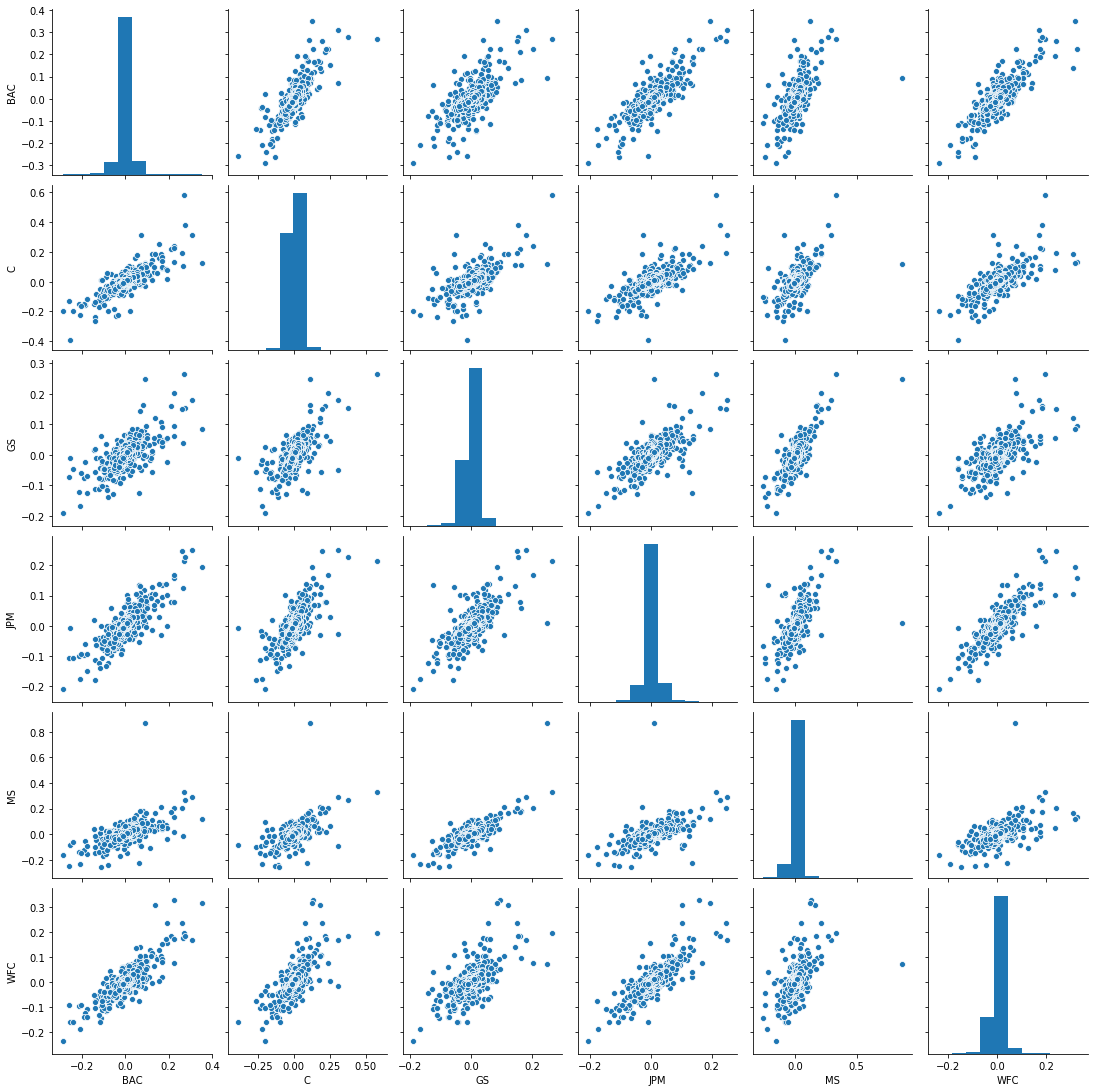

In [23]:
sns.pairplot(returns)

* Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?

>>>>> visually, i would say that MS stands out, it seems to be less corelated to the other banks

In [ ]:
#returns[1:]


* Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.

In [182]:

Worst1 = returns.min(axis=0,skipna=True)
Worst1


Returns
BAC       -0.289694
C         -0.390244
GS        -0.189596
JPM       -0.207274
MS        -0.258929
WFC       -0.238223
Year    2006.000000
dtype: float64

In [183]:
Worst = returns.idxmin()
Worst2 = pd.concat([Worst1, Worst], axis=1, sort=False)
Worst2.columns = ['Largest Drop','Date']
Worst2

,Largest Drop,Date
Returns,,
BAC,-0.289694,2009-01-20
C,-0.390244,2009-02-27
GS,-0.189596,2009-01-20
JPM,-0.207274,2009-01-20
MS,-0.258929,2008-10-09
WFC,-0.238223,2009-01-20
Year,2006.000000,2006-01-03


In [26]:
# Worst Drop (4 of them on Inauguration day)

In [184]:
Best1 = returns.max(axis=0,skipna=True)
Best1

Returns
BAC        0.352691
C          0.578249
GS         0.264678
JPM        0.250967
MS         0.869835
WFC        0.327645
Year    2015.000000
dtype: float64

In [185]:
Best = returns.idxmax()
Best2 = pd.concat([Best1, Best], axis=1, sort=False)
Best2.columns = ['Largest Increase','Date']
Best2

,Largest Increase,Date
Returns,,
BAC,0.352691,2009-04-09
C,0.578249,2008-11-24
GS,0.264678,2008-11-24
JPM,0.250967,2009-01-21
MS,0.869835,2008-10-13
WFC,0.327645,2008-07-16
Year,2015.000000,2015-01-02


In [186]:
# Best Single Day Gain


* Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [187]:
Vol = returns.std()
Vol

Returns
BAC     0.036640
C       0.038664
GS      0.025385
JPM     0.027662
MS      0.037812
WFC     0.030232
Year    2.872022
dtype: float64

In [188]:
# For year 2015
returns.index.dtype
returns['Year'] = pd.DatetimeIndex(returns.index).year
returns.head()

Returns,BAC,C,GS,JPM,MS,WFC,Year
Date,,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,2006
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599,2006
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110,2006
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874,2006
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158,2006


In [32]:
Vol15 = returns[returns['Year']==2015].std()
Vol15

Returns
BAC     0.016163
C       0.015289
GS      0.014046
JPM     0.014017
MS      0.016249
WFC     0.012591
Year    0.000000
dtype: float64

* Create a distplot using seaborn of the 2015 returns for Morgan Stanley

In [33]:
returns['MS'][returns['Year']==2015 ]

Date
2015-01-02   -0.002320
2015-01-05   -0.031258
2015-01-06   -0.028800
2015-01-07    0.014278
2015-01-08    0.014889
                ...   
2015-12-24   -0.003681
2015-12-28   -0.009544
2015-12-29    0.011812
2015-12-30   -0.009831
2015-12-31   -0.013031
Name: MS, Length: 252, dtype: float64

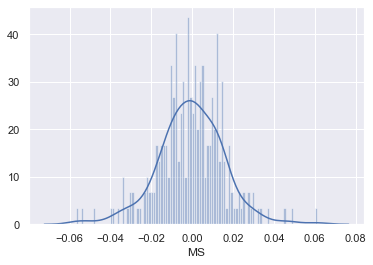

In [34]:
sns.set(rc={"figure.figsize": (6, 4)})

x = returns['MS'][returns['Year']==2015 ]

ax = sns.distplot(x, bins = 100)
plt.show()

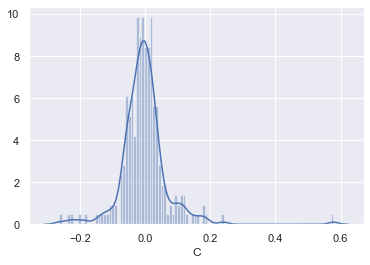

In [35]:
sns.set(rc={"figure.figsize": (6, 4)})

x = returns['C'][returns['Year']==2008 ]

ax = sns.distplot(x, bins = 100)
plt.show()

* Create a distplot using seaborn of the 2008 returns for CitiGroup 

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

* Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)

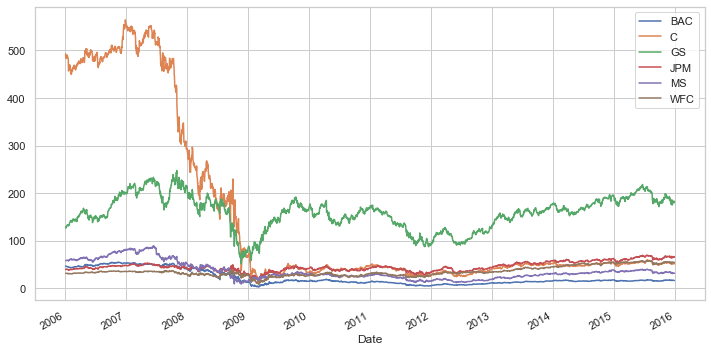

In [37]:
list_bank = ['BAC','C','GS','JPM','MS','WFC']

for price in list_bank:
    bank_stock[price]["Close"].plot(label=price,figsize=(12,6))
plt.legend()

In [38]:
# Using for loop

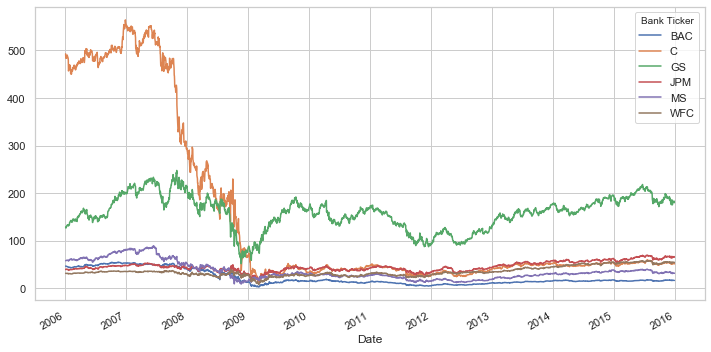

In [39]:
bank_stock.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,6))

In [40]:
# Using .xs

In [55]:
# plotly
bank_stock.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

*** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008***

In [194]:
# Not required, just practice:  Select ponly BAc, Closing price
cc = ax = bank_stock['BAC','Close']
cc

Date
2006-01-03    47.080002
2006-01-04    46.580002
2006-01-05    46.639999
2006-01-06    46.570000
2006-01-09    46.599998
                ...    
2015-12-24    17.270000
2015-12-28    17.129999
2015-12-29    17.280001
2015-12-30    17.049999
2015-12-31    16.830000
Name: (BAC, Close), Length: 2518, dtype: float64

In [43]:
# Exercise:

bank_stock['BAC','MA30'] = bank_stock['BAC','Close'].rolling(window=30).mean()
bank_stock.head()

Bank Ticker        BAC                                              \
Stock Info        Open       High        Low      Close  Adj Close   
Date                                                                 
2006-01-03   46.919998  47.180000  46.150002  47.080002  35.054218   
2006-01-04   47.000000  47.240002  46.450001  46.580002  34.681938   
2006-01-05   46.580002  46.830002  46.320000  46.639999  34.726604   
2006-01-06   46.799999  46.910000  46.349998  46.570000  34.674480   
2006-01-09   46.720001  46.970001  46.360001  46.599998  34.696808   

Bank Ticker                       C                                      ...  \
Stock Info       Volume        Open        High         Low       Close  ...   
Date                                                                     ...   
2006-01-03   16296700.0  490.000000  493.799988  481.100006  492.899994  ...   
2006-01-04   17757900.0  488.600006  491.000000  483.500000  483.799988  ...   
2006-01-05   14970700.0  484.399994  487.799988  484.000000  486.200012  ...   
2006-01-06   12599800.0  488.799988  489.000000  482.000000  486.200012  ...   
2006-01-09   15619400.0  486.000000  487.399994  483.000000  483.899994  ...   

Bank Ticker         MS                              WFC                        \
Stock Info       Close  Adj Close     Volume       Open       High        Low   
Date                                                                            
2006-01-03   58.310001  37.399338  5377000.0  31.600000  31.975000  31.195000   
2006-01-04   58.349998  37.424999  7977800.0  31.799999  31.820000  31.365000   
2006-01-05   58.509998  37.527611  5778000.0  31.500000  31.555000  31.309999   
2006-01-06   58.570000  37.566090  6889800.0  31.580000  31.775000  31.385000   
2006-01-09   59.189999  37.963749  4144500.0  31.674999  31.825001  31.555000   

Bank Ticker                                    BAC  
Stock Info       Close  Adj Close      Volume MA30  
Date                                                
2006-01-03   31.900000  20.408512  11016400.0  NaN  
2006-01-04   31.530001  20.171795  10870000.0  NaN  
2006-01-05   31.495001  20.149401  10158000.0  NaN  
2006-01-06   31.680000  20.267757   8403800.0  NaN  
2006-01-09   31.674999  20.264565   5619600.0  NaN  

[5 rows x 37 columns]

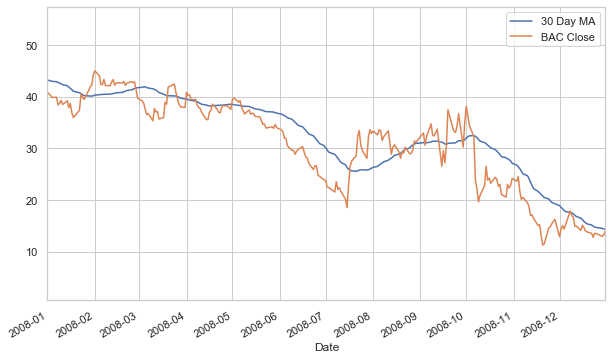

In [44]:
plt.figure(figsize=(10,6))

ax = bank_stock['BAC','MA30'].plot(label="30 Day MA")
ax = bank_stock['BAC','Close'].plot(label="BAC Close")

ax.set_xlim(['2008-01-01','2008-12-31'])

plt.legend()

In [192]:
# Not required, just practice:  Get closing AND opening prices of all stocks 

bb = bank_stock.loc[:,bank_stock.columns.get_level_values(1).isin({'Close','Open'})]
bb.head()

Bank Ticker        BAC                      C                      GS  \
Stock Info        Open      Close        Open       Close        Open   
Date                                                                    
2006-01-03   46.919998  47.080002  490.000000  492.899994  126.699997   
2006-01-04   47.000000  46.580002  488.600006  483.799988  127.349998   
2006-01-05   46.580002  46.639999  484.399994  486.200012  126.000000   
2006-01-06   46.799999  46.570000  488.799988  486.200012  127.290001   
2006-01-09   46.720001  46.599998  486.000000  483.899994  128.500000   

Bank Ticker                    JPM                    MS             \
Stock Info        Close       Open      Close       Open      Close   
Date                                                                  
2006-01-03   128.869995  39.830002  40.189999  57.169998  58.310001   
2006-01-04   127.089996  39.779999  39.619999  58.700001  58.349998   
2006-01-05   127.040001  39.610001  39.740002  58.549999  58.509998   
2006-01-06   128.839996  39.919998  40.020000  58.770000  58.570000   
2006-01-09   130.389999  39.880001  40.669998  58.630001  59.189999   

Bank Ticker        WFC             
Stock Info        Open      Close  
Date                               
2006-01-03   31.600000  31.900000  
2006-01-04   31.799999  31.530001  
2006-01-05   31.500000  31.495001  
2006-01-06   31.580000  31.680000  
2006-01-09   31.674999  31.674999

In [45]:
# Get closing prices of all stocks and drop level 1 for corr matrice

aa = bank_stock.loc[:,bank_stock.columns.get_level_values(1).isin({"Close"})]
aa.columns = aa.columns.droplevel(1)
aa.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999


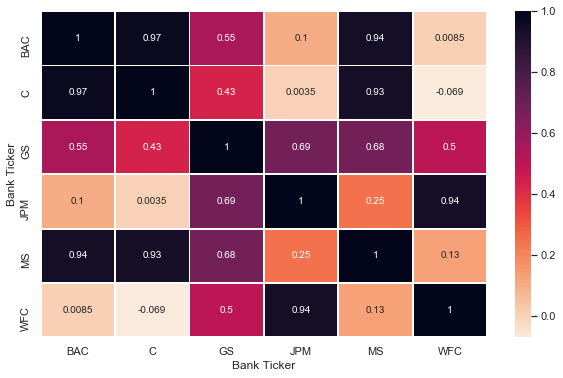

In [46]:
cmap = sns.cm.rocket_r

x = aa

fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(x.corr(),linewidths=1, linecolor='white', cmap = cmap, annot=True)     

* Create a heatmap of the correlation between the stocks Close Price.

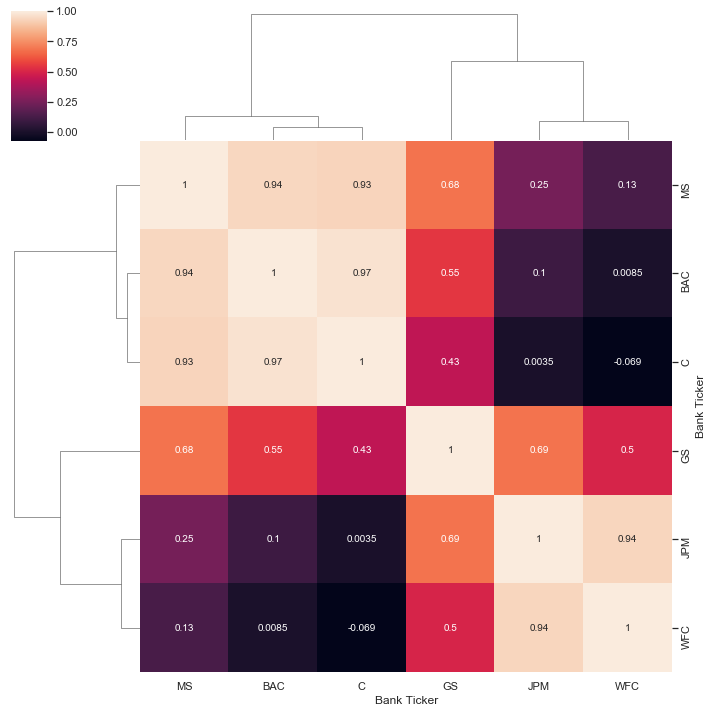

In [47]:
sns.clustermap(x.corr(), annot=True)

In [48]:
# seaborn cluster map

* Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016

In [50]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2015-12-31'].iplot(kind='candle')

* Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015

In [54]:
MS['Close'].loc['2008-01-01':'2008-12-31'].ta_plot(study='sma',periods=[13,21,55],title='SMA')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [53]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')